In [1]:
import re
import matplotlib
import matplotlib.colors as colors

import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import os.path
import sys
import gzip
import matplotlib.gridspec as gridspec
from scipy.stats import norm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
labels = ['4_log2d_15no','4_log2d_no','1_log2d_dimtest_no','2_log2d_highz_no']

KL_list_names = ['KL_list_70','KL_list_50','KL_list_30','KL_list_15','KL_list_10','KL_list_05']
R2_list_names = ['R2_list_70','R2_list_50','R2_list_30','R2_list_15','R2_list_10','R2_list_05']
X2_list_names = ['X2_list_70','X2_list_50','X2_list_30','X2_list_15','X2_list_10','X2_list_05']



In [3]:
vel_str = 'vphi'
type_sigma = 'calculated sigma'
tsigma = 'calc_sigma'
#type_sigma = 'MC sigma'
#tsigma = 'MC_sigma'

In [4]:
filepath = '/tigress/dropulic/Rsquare_list_'+vel_str+'_sorted.txt'
sigmas = []
R2s = []
num_stars_list = []
with open(filepath, "r") as fp:
    for line in open(filepath, "r"):
        line = fp.readline()
        sigma = re.search('sigmaleq (\d+.\d+)', line)
        num_stars = re.search(', (\d+) ', line)
        R = re.search('R2 = ([+-]?\d+(?:\.\d+)?)', line)
        if R == None: 
            R = re.search('nan', line)
            if R == None: 
                R = re.search('inf', line)
                R = 99.0
            R = -1.0
            R2s.append(float(R))
        else: R2s.append(float(R.group(1)))
        sigmas.append(float(sigma.group(1)))
        num_stars_list.append(float(num_stars.group(1)))
print(num_stars_list)        
print(sigmas)
print(len(R2s))
print(len(sigmas))

[25392.0, 25465.0, 5980.0, 20530.0, 23206.0, 24867.0, 499561.0, 500000.0, 118737.0, 434222.0, 472118.0, 495281.0, 117085.0, 432650.0, 471333.0, 495375.0, 499425.0, 500000.0, 492460.0, 499961.0, 148026.0, 323408.0, 388977.0, 469661.0]
[100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0]
24
24


In [5]:
def plot_R2(row,ax_1, ax_2,fig,ax):
    cm = plt.cm.get_cmap('nipy_spectral')
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    R2_list_70 = []
    R2_list_50 = []
    R2_list_30 = []
    R2_list_15 = []
    R2_list_10 = []
    R2_list_05 = []
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        no_stars = num_stars_list[list_idx:list_idx+6]
        X = sigmas[list_idx:list_idx+6]
        Y = R2s[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(X.count(element) > 1 for element in X) == True and X[-1] != 150.0:
                #print(list_idx)
                X = sigmas[list_idx:list_idx+6-increm]
                Y = R2s[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                #print("X iter " +str(increm)+' '+ str(X))
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        #print(np.array(no_stars))
        #print(Y)
        indices = np.argsort(np.array(X))
        #print(count)
        string_label = labels[count]
        #print(string_label)
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if len(X) >= 6:R2_list_70.append(np.array(Y)[indices[5]])
        if len(X) >= 5:R2_list_50.append(np.array(Y)[indices[4]])
        if len(X) >= 4:R2_list_30.append(np.array(Y)[indices[3]])
        if len(X) >= 3:R2_list_15.append(np.array(Y)[indices[2]])
        if len(X) >= 2:R2_list_10.append(np.array(Y)[indices[1]])
        if len(X) >= 1:R2_list_05.append(np.array(Y)[indices[0]])
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(np.array(X)[indices])
            if X.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else:ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(X)[index_i] == 30.0: marker = all_poss[0]
                if np.array(X)[index_i] == 50.0:marker = all_poss[1]
                if np.array(X)[index_i] == 60.0:marker = all_poss[2]
                if np.array(X)[index_i] == 80.0:marker = all_poss[3]
                if np.array(X)[index_i] == 100.0:marker = all_poss[4]
                if np.array(X)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(X)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(X)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(X)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(X)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(X)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(X)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='1')
    purple_patch = mpatches.Patch(color='purple', label='2')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].set_ylim(0,1)
    #ax[row,ax_2].set_ylim(0,1)
    ax[row].set_title('No Dropout')    
    #ax[row,ax_2].set_title('0.1 Dropout')
    ax[row].set_xlabel('$\sigma$ [km/s]')
    ax[row].set_ylabel('$R^{2}$')
    #ax[row,ax_2].set_xlabel('$\sigma$ [km/s]')
    #ax[row,ax_2].set_ylabel('$R^{2}$')
    ax[row].annotate("Better", xy=(10, 0.9), xytext=(10, 0.7), arrowprops=dict(arrowstyle="->"),horizontalalignment='center')
    ax[row].annotate("Better", xy=(10, 0.2), xytext=(12, 0.2), arrowprops=dict(arrowstyle="->"),horizontalalignment='left',verticalalignment='center')
    #plt.legend(loc='upper left')
    #plt.savefig('Rsquare_'+vel_str+'_newquant.png')

In [6]:
filepath2 = '/tigress/dropulic/KL_list_'+vel_str+'_sorted.txt'
cm = plt.cm.get_cmap('nipy_spectral')
#sigmas = []
KLs = []
with open(filepath2, "r") as fp2:
    for line in open(filepath2, "r"):
        line = fp2.readline()
        #sigma = re.search('sigmaleq (\d+.\d+)', line)
        KL = re.search('KL = ([+-]?\d+(?:\.\d+)?)', line)
        if KL == None: 
            KL = re.search('nan', line)
            KL = -1.0
            if KL == None: 
                KL = re.search('inf', line)
                KL = 99.0
            
            KLs.append(float(KL))
        else: KLs.append(float(KL.group(1)))
        #sigmas.append(float(sigma.group(1)))
print(KLs)
print(sigmas)
print(len(KLs))
print(len(sigmas))

[0.0014643245332423185, 0.0009655906775180583, -1.0, -1.0, -1.0, 0.002993859742660734, 0.039782956914161685, 0.03909879101985924, 0.03756332610576156, 0.05005627734683476, 0.04555917103580451, 0.04173730792658764, -1.0, -1.0, 0.045398786782181566, 0.04173968668212642, 0.040472174694222735, 0.039916402294058025, 0.030211912083165652, 0.023407419614278273, 0.0382459677217641, 0.04592984772079396, 0.040175733631900565, 0.03452153389897442]
[100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0]
24
24


In [7]:
def plot_KL(row,ax_1, ax_2,fig,ax):
    cm = plt.cm.get_cmap('nipy_spectral')
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    KL_list_70 = []
    KL_list_50 = []
    KL_list_30 = []
    KL_list_15 = []
    KL_list_10 = []
    KL_list_05 = []
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        no_stars = num_stars_list[list_idx:list_idx+6]
        X = sigmas[list_idx:list_idx+6]
        Y = KLs[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(X.count(element) > 1 for element in X) == True and X[-1] != 150.0:
                #print(str(list_idx) + str(X))
                X = sigmas[list_idx:list_idx+6-increm]
                Y = KLs[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        indices = np.argsort(np.array(X))
        string_label = labels[count]
        #print(len(X), len(Y))
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if len(X) >= 6:KL_list_70.append(np.array(Y)[indices[5]])
        if len(X) >= 5:KL_list_50.append(np.array(Y)[indices[4]])
        if len(X) >= 4:KL_list_30.append(np.array(Y)[indices[3]])
        if len(X) >= 3:KL_list_15.append(np.array(Y)[indices[2]])
        if len(X) >= 2:KL_list_10.append(np.array(Y)[indices[1]])
        if len(X) >= 1:KL_list_05.append(np.array(Y)[indices[0]])
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(np.array(X)[indices])
            if X.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else:ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(X)[index_i] == 30.0:marker = all_poss[0]
                if np.array(X)[index_i] == 50.0:marker = all_poss[1]
                if np.array(X)[index_i] == 60.0:marker = all_poss[2]
                if np.array(X)[index_i] == 80.0:marker = all_poss[3]
                if np.array(X)[index_i] == 100.0:marker = all_poss[4]
                if np.array(X)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(X)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(X)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(X)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(X)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(X)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(X)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    #fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='dimtest')
    purple_patch = mpatches.Patch(color='purple', label='highz')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].annotate("Better", xy=(10, 1), xytext=(10, 0.8), arrowprops=dict(arrowstyle="<-"),horizontalalignment='center')
    ax[row].annotate("Better", xy=(10, 0.6), xytext=(12, 0.6), arrowprops=dict(arrowstyle="->"),horizontalalignment='left',verticalalignment='center')
    ax[row].set_ylim(0,1.5)
   # ax[row,ax_2].set_ylim(0,1.5)
    #ax[row,ax_1].set_title('No Dropout')    
    #ax[row,ax_2].set_title('0.1 Dropout')  
    ax[row].set_xlabel('$\sigma$ [km/s]')
    ax[row].set_ylabel('KL(truth kde $||$ pred kde)')
   # ax[row,ax_2].set_xlabel('$\sigma$ [km/s]')
   # ax[row,ax_2].set_ylabel('KL(truth kde $||$ pred kde)')

#plt.savefig('KL_'+vel_str+'_newquant.png')

In [8]:
def plot_KLvsR2(row,ax_1, ax_2,fig,ax):
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        sorter = sigmas[list_idx:list_idx+6]
        X = R2s[list_idx:list_idx+6]
        Y = KLs[list_idx:list_idx+6]
        no_stars = num_stars_list[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(sorter.count(element) > 1 for element in sorter) == True and sorter[-1] != 150.0:
                #print(str(list_idx) + str(X))
                sorter = sigmas[list_idx:list_idx+6-increm]
                X = R2s[list_idx:list_idx+6-increm]
                Y = KLs[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        indices = np.argsort(np.array(sorter))
        string_label = labels[count]
        #print(string_label)
        #print(len(X), len(Y))
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(indices)
            if sorter.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else: ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
                if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
                if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
                if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
                if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
                if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='dimtest')
    purple_patch = mpatches.Patch(color='purple', label='highz')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].set_ylim(0,1.5)
  #  ax[row,ax_2].set_ylim(0,1.5)
    ax[row].set_xlim(0,1)
   # ax[row,ax_2].set_xlim(0,1)
    ax[row].set_title('No Dropout')    
  #  ax[row,ax_2].set_title('0.1 Dropout')  
    ax[row].set_xlabel('$R^{2}$')
    ax[row].set_ylabel('KL(truth kde $||$ pred kde)')
  #  ax[row,ax_2].set_xlabel('$R^{2}$')
  #  ax[row,ax_2].set_ylabel('KL(truth kde $||$ pred kde)')
#plt.savefig('klvsr2_'+vel_str+'_newquant.png')


In [9]:
filepath3 = '/tigress/dropulic/Xsquare_list_'+vel_str+'_sorted.txt'
sigmas = []
X2s = []
with open(filepath3, "r") as fp3:
    for line in open(filepath3, "r"):
        line = fp3.readline()
        sigma = re.search('sigmaleq (\d+.\d+)', line)
        X2 = re.search('X2 = ([+-]?\d+(?:\.\d+)?)', line)
        if X2 == None: 
            X2 = re.search('nan', line)
            if X2 == None: 
                X2 = re.search('inf', line)
                X2 = 99.0
            X2 = -1.0
            X2s.append(float(X2))
        else: X2s.append(float(X2.group(1)))
        sigmas.append(float(sigma.group(1)))
print(X2s)
print(sigmas)
print(len(X2s))
print(len(sigmas))

[0.8004952757420596, 0.8003901152788697, 0.8664129421653046, 0.8051617392238171, 0.7967433202107939, 0.7959985275190337, 0.6866361798527498, 0.6868193018025188, 0.7388790662621776, 0.6853955695607731, 0.6853114831407323, 0.6859005476490775, 0.7796936063805779, 0.7072261336069574, 0.7015512422143237, 0.6995351331184115, 0.6995698092764654, 0.6995956973050064, 0.7420820895866166, 0.7437451043241058, 0.7750381671437175, 0.7486711022282572, 0.749585263608921, 0.7431389302493036]
[100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0, 30.0, 50.0, 60.0, 80.0, 100.0, 150.0, 100.0, 150.0, 30.0, 50.0, 60.0, 80.0]
24
24


In [10]:
def plot_X2(row,ax_1, ax_2,fig,ax,upper_lim):
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    X2_list_70 = []
    X2_list_50 = []
    X2_list_30 = []
    X2_list_15 = []
    X2_list_10 = []
    X2_list_05 = []
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        X = sigmas[list_idx:list_idx+6]
        Y = X2s[list_idx:list_idx+6]
        no_stars = num_stars_list[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(X.count(element) > 1 for element in X) == True and X[-1] != 150.0:
                #print(str(list_idx) + str(X))
                X = sigmas[list_idx:list_idx+6-increm]
                Y = X2s[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        indices = np.argsort(np.array(X))
        string_label = labels[count]
        #print(len(X), len(Y))
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if len(X) >= 6:X2_list_70.append(np.array(Y)[indices[5]])
        if len(X) >= 5:X2_list_50.append(np.array(Y)[indices[4]])
        if len(X) >= 4:X2_list_30.append(np.array(Y)[indices[3]])
        if len(X) >= 3:X2_list_15.append(np.array(Y)[indices[2]])
        if len(X) >= 2:X2_list_10.append(np.array(Y)[indices[1]])
        if len(X) >= 1:X2_list_05.append(np.array(Y)[indices[0]])
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(np.array(X)[indices])
            if X.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else: ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(X)[index_i] == 30.0: marker = all_poss[0]
                if np.array(X)[index_i] == 50.0:marker = all_poss[1]
                if np.array(X)[index_i] == 60.0:marker = all_poss[2]
                if np.array(X)[index_i] == 80.0:marker = all_poss[3]
                if np.array(X)[index_i] == 100.0:marker = all_poss[4]
                if np.array(X)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(X)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(X)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(X)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(X)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(X)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(X)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    #fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='dimtest')
    purple_patch = mpatches.Patch(color='purple', label='highz')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].annotate("Better", xy=(10, upper_lim - 3), xytext=(10, upper_lim - 4), arrowprops=dict(arrowstyle="<-"),horizontalalignment='center')
    ax[row].annotate("Better", xy=(10, upper_lim - 6), xytext=(12, upper_lim - 6), arrowprops=dict(arrowstyle="->"),horizontalalignment='left',verticalalignment='center')
    ax[row].set_ylim(0,upper_lim)
   # ax[row,ax_2].set_ylim(0,upper_lim)
    #ax[row,ax_1].set_title('No Dropout')    
    #ax[row,ax_2].set_title('0.1 Dropout')  
    ax[row].set_xlabel('$\sigma$ [km/s]')
    ax[row].set_ylabel('$\chi^{2}$')
  #  ax[row,ax_2].set_xlabel('$\sigma$ [km/s]')
  #  ax[row,ax_2].set_ylabel('$\chi^{2}$')

#plt.savefig('Xsquare_'+vel_str+'_newquant.png')


In [11]:
def plot_KLvsX2(row,ax_1, ax_2,fig,ax, upper_lim):
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        sorter = sigmas[list_idx:list_idx+6]
        X = X2s[list_idx:list_idx+6]
        Y = KLs[list_idx:list_idx+6]
        no_stars = num_stars_list[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(sorter.count(element) > 1 for element in sorter) == True and sorter[-1] != 150.0:
                #print(str(list_idx) + str(X))
                sorter = sigmas[list_idx:list_idx+6-increm]
                X = X2s[list_idx:list_idx+6-increm]
                Y = KLs[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        indices = np.argsort(np.array(sorter))
        string_label = labels[count]
        #print(string_label)
        #print(len(X), len(Y))
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(indices)
            if sorter.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else: ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
                if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
                if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
                if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
                if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
                if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    #fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='dimtest')
    purple_patch = mpatches.Patch(color='purple', label='highz')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].set_ylim(0,1.5)
  #  ax[row,ax_2].set_ylim(0,1.5)
    ax[row].set_xlim(0,upper_lim)
  #  ax[row,ax_2].set_xlim(0,upper_lim)
    #ax[row,ax_1].set_title('No Dropout')    
    #ax[row,ax_2].set_title('0.1 Dropout')  
    ax[row].set_xlabel('$X^{2}$')
    ax[row].set_ylabel('KL(truth kde $||$ pred kde)')
  #  ax[row,ax_2].set_xlabel('$X^{2}$')
  #  ax[row,ax_2].set_ylabel('KL(truth kde $||$ pred kde)')
#plt.savefig('klvsx2_'+vel_str+'_newquant.png')

In [12]:
def plot_X2vsR2(row,ax_1, ax_2,fig,ax, upper_lim):
    sigma_list = [30.0, 50.0,60.0,80.0,100.0,150.0]
    count = 0
    #fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(20,10))
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    from matplotlib.colors import LogNorm
    all_poss=['d','h','^','o','s','*']
    list_idx = 0
    while list_idx < (len(sigmas)):
        #print('li' +str(list_idx))
        #need to get this to cycle based on if the cut exists or not
        #if the first group of 6 numbers has duplicates, shorten from the end until it does not
        sorter = sigmas[list_idx:list_idx+6]
        X = R2s[list_idx:list_idx+6]
        Y = X2s[list_idx:list_idx+6]
        no_stars = num_stars_list[list_idx:list_idx+6]
        #print("X inint "+str(X))
        new_upper_list_idx = list_idx + 6
        for increm in range(1,6):
            if any(sorter.count(element) > 1 for element in sorter) == True and sorter[-1] != 150.0:
                #print(str(list_idx) + str(X))
                sorter = sigmas[list_idx:list_idx+6-increm]
                X = R2s[list_idx:list_idx+6-increm]
                Y = X2s[list_idx:list_idx+6-increm]
                no_stars = num_stars_list[list_idx:list_idx+6-increm]
                new_upper_list_idx = list_idx+6-increm #no +1 at the end of this line bc python lists start at 0
        list_idx = new_upper_list_idx
        indices = np.argsort(np.array(sorter))
        string_label = labels[count]
        #print(string_label)
        #print(len(X), len(Y))
        if string_label.startswith('1'): color = 'red'
        if string_label.startswith('2'): color = 'purple'
        if string_label.startswith('3'): color = 'blue'  
        if string_label.startswith('4'): color = 'green' 
        if string_label.startswith('5'): color = 'orange'
        if string_label.endswith('no'):
            if "log2d" in string_label: linestyle = '-'
            if "15" in string_label: linestyle = '--'
            #print(indices)
            if sorter.count(5.0)==1: ax[row,ax_1].plot(np.array(X)[indices[1:]], np.array(Y)[indices[1:]], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            else: ax[row].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
            for index_i in indices:
                if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
                if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
                if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
                if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
                if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
                if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
                color = np.zeros(1)
                color[0] = np.array(no_stars)[index_i]
                sc = ax[row].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
#         elif string_label.endswith('p1'): 
#             if "log1d" in string_label: linestyle = '-'
#             if "log2d" in string_label: linestyle = '--'
#             #print(np.array(X)[indices])
#             ax[row,ax_2].plot(np.array(X)[indices], np.array(Y)[indices], label= labels[count], color = color, linestyle = linestyle, ms = 1)
#             for index_i in indices:
#                 if np.array(sorter)[index_i] == 30.0: marker = all_poss[0]
#                 if np.array(sorter)[index_i] == 50.0:marker = all_poss[1]
#                 if np.array(sorter)[index_i] == 60.0:marker = all_poss[2]
#                 if np.array(sorter)[index_i] == 80.0:marker = all_poss[3]
#                 if np.array(sorter)[index_i] == 100.0:marker = all_poss[4]
#                 if np.array(sorter)[index_i] == 150.0:marker = all_poss[5]
#                 color = np.zeros(1)
#                 color[0] = np.array(no_stars)[index_i]
#                 ax[row,ax_2].scatter(np.array(X)[index_i].reshape(-1,1), np.array(Y)[index_i].reshape(-1,1), s = 70, vmin = 0, vmax = 500000, label= labels[count], c = color.reshape(-1,1), marker = marker, cmap=cm)
        count = count + 1
    #fig.colorbar(sc,orientation='horizontal',ax=ax[:], shrink=0.5, label = "number of stars")
    red_patch = mpatches.Patch(color='red', label='dimtest')
    purple_patch = mpatches.Patch(color='purple', label='highz')
    blue_patch = mpatches.Patch(color='blue', label='3')
    green_patch = mpatches.Patch(color='green', label='4')
    orange_patch = mpatches.Patch(color='orange', label='5')
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='no cut')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='15 deg cone')
    all_stars = Line2D([0], [0], marker='*', label='$\sigma \leq 150.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=14)
    p50_stars = Line2D([0], [0], marker='s', label='$\sigma \leq 100.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p25_stars = Line2D([0], [0], marker='o', label='$\sigma \leq 80.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p10_stars = Line2D([0], [0], marker='^', label='$\sigma \leq 60.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p05_stars = Line2D([0], [0], marker='h', label='$\sigma \leq 50.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    p01_stars = Line2D([0], [0], marker='d', label='$\sigma \leq 30.0$',markerfacecolor='black', color = 'black',linestyle = 'None',markersize=10)
    #plt.legend(fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.legend(handles=[red_patch,purple_patch, blue_patch ,green_patch,orange_patch, solid_patch,dashed_patch, all_stars, p50_stars, p25_stars,
                       p10_stars,p05_stars,p01_stars], ncol = 2)
    ax[row].set_ylim(0,upper_lim)
   # ax[row,ax_2].set_ylim(0,upper_lim)
    ax[row].set_xlim(0,1)
   # ax[row,ax_2].set_xlim(0,1)
    #ax[row,ax_1].set_title('No Dropout')    
    #ax[row,ax_2].set_title('0.1 Dropout')  
    ax[row].set_xlabel('$R^{2}$')
    ax[row].set_ylabel('$X^{2}$')
   # ax[row,ax_2].set_xlabel('$R^{2}$')
   # ax[row,ax_2].set_ylabel('$X^{2}$')
#plt.savefig('x2vsr2_'+vel_str+'_newquant.png')


In [13]:
#need to figure out why X^2 is so high for plots without dropout. 

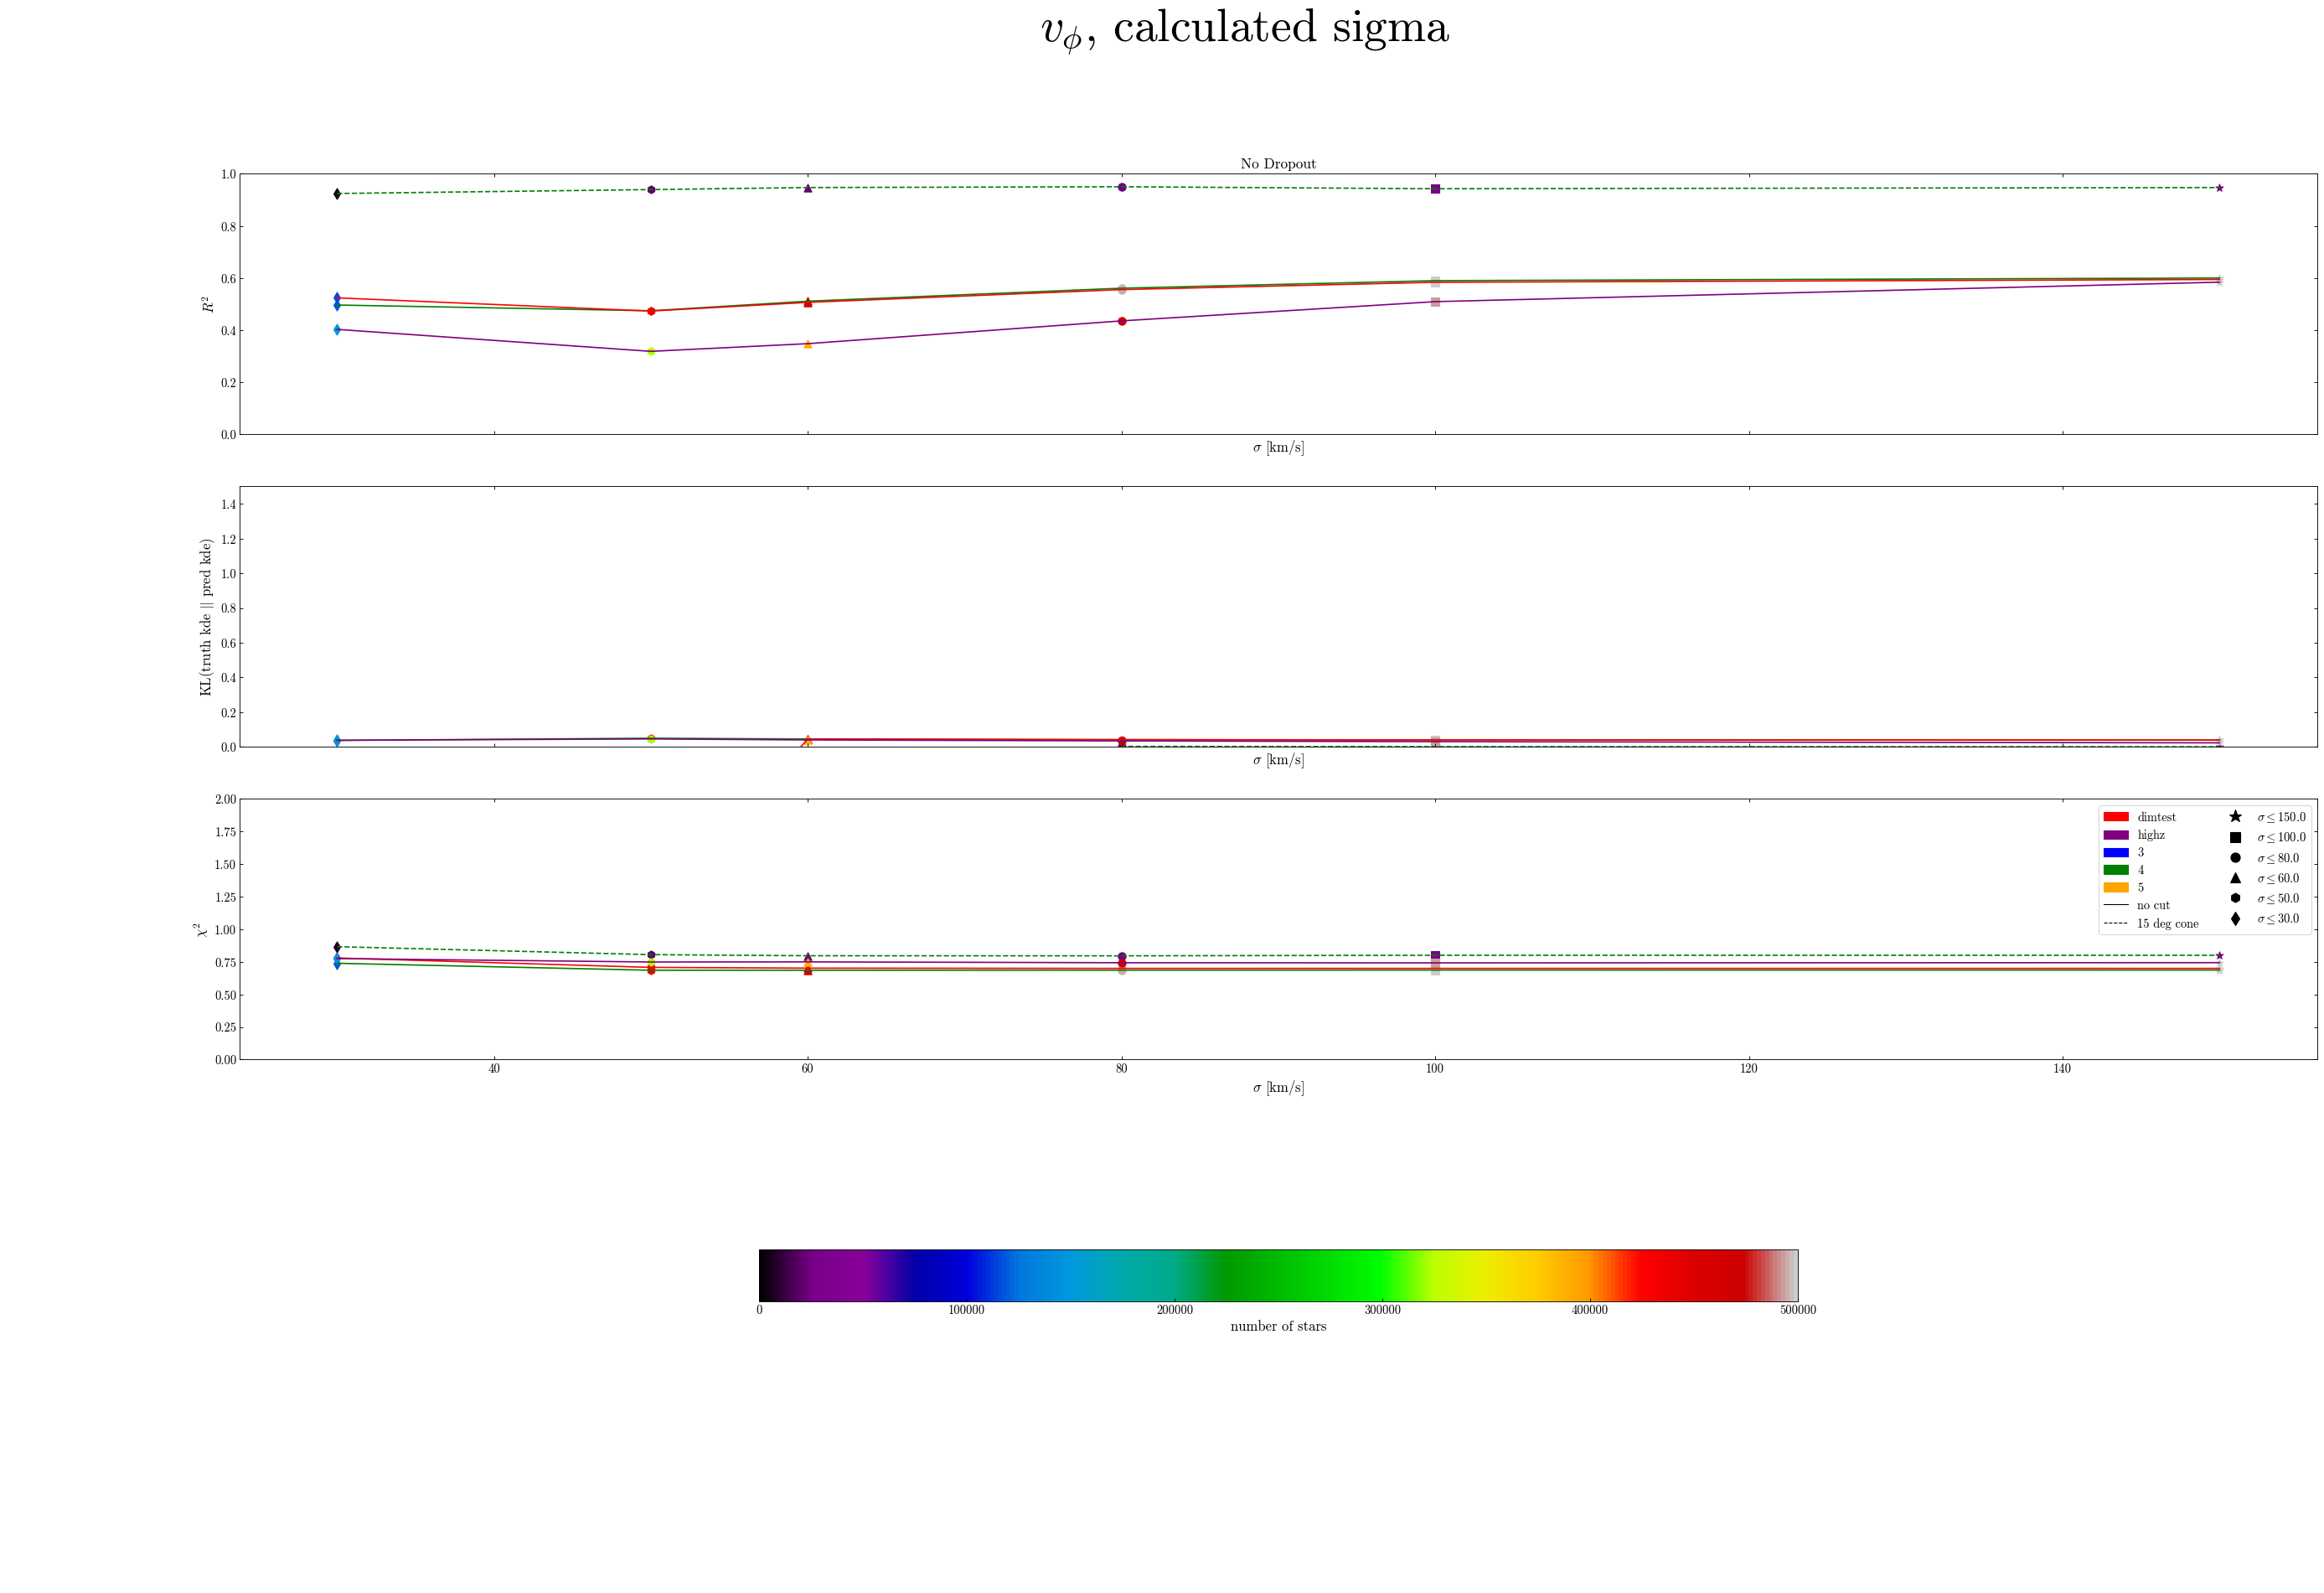

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False,figsize=(40,25))
plot_R2(0,0,1,fig,ax)
plot_KL(1,0,1,fig,ax)
if vel_str != 'vth': plot_X2(2,0,1,fig,ax,2)
else: plot_X2(2,0,1,fig,ax,2)
if vel_str == 'vth': plt.suptitle('$v_{\\theta}$, '+type_sigma, fontsize = 50)
if vel_str == 'vlos': plt.suptitle('$v_{los}$, '+type_sigma, fontsize = 50)
if vel_str == 'vphi': plt.suptitle('$v_{\\phi}$, '+type_sigma, fontsize = 50)    
if vel_str == 'vr': plt.suptitle('$v_{r}$, '+type_sigma, fontsize = 50)
plt.savefig('test_stat_X2loss_'+vel_str+'_'+tsigma+'.png')

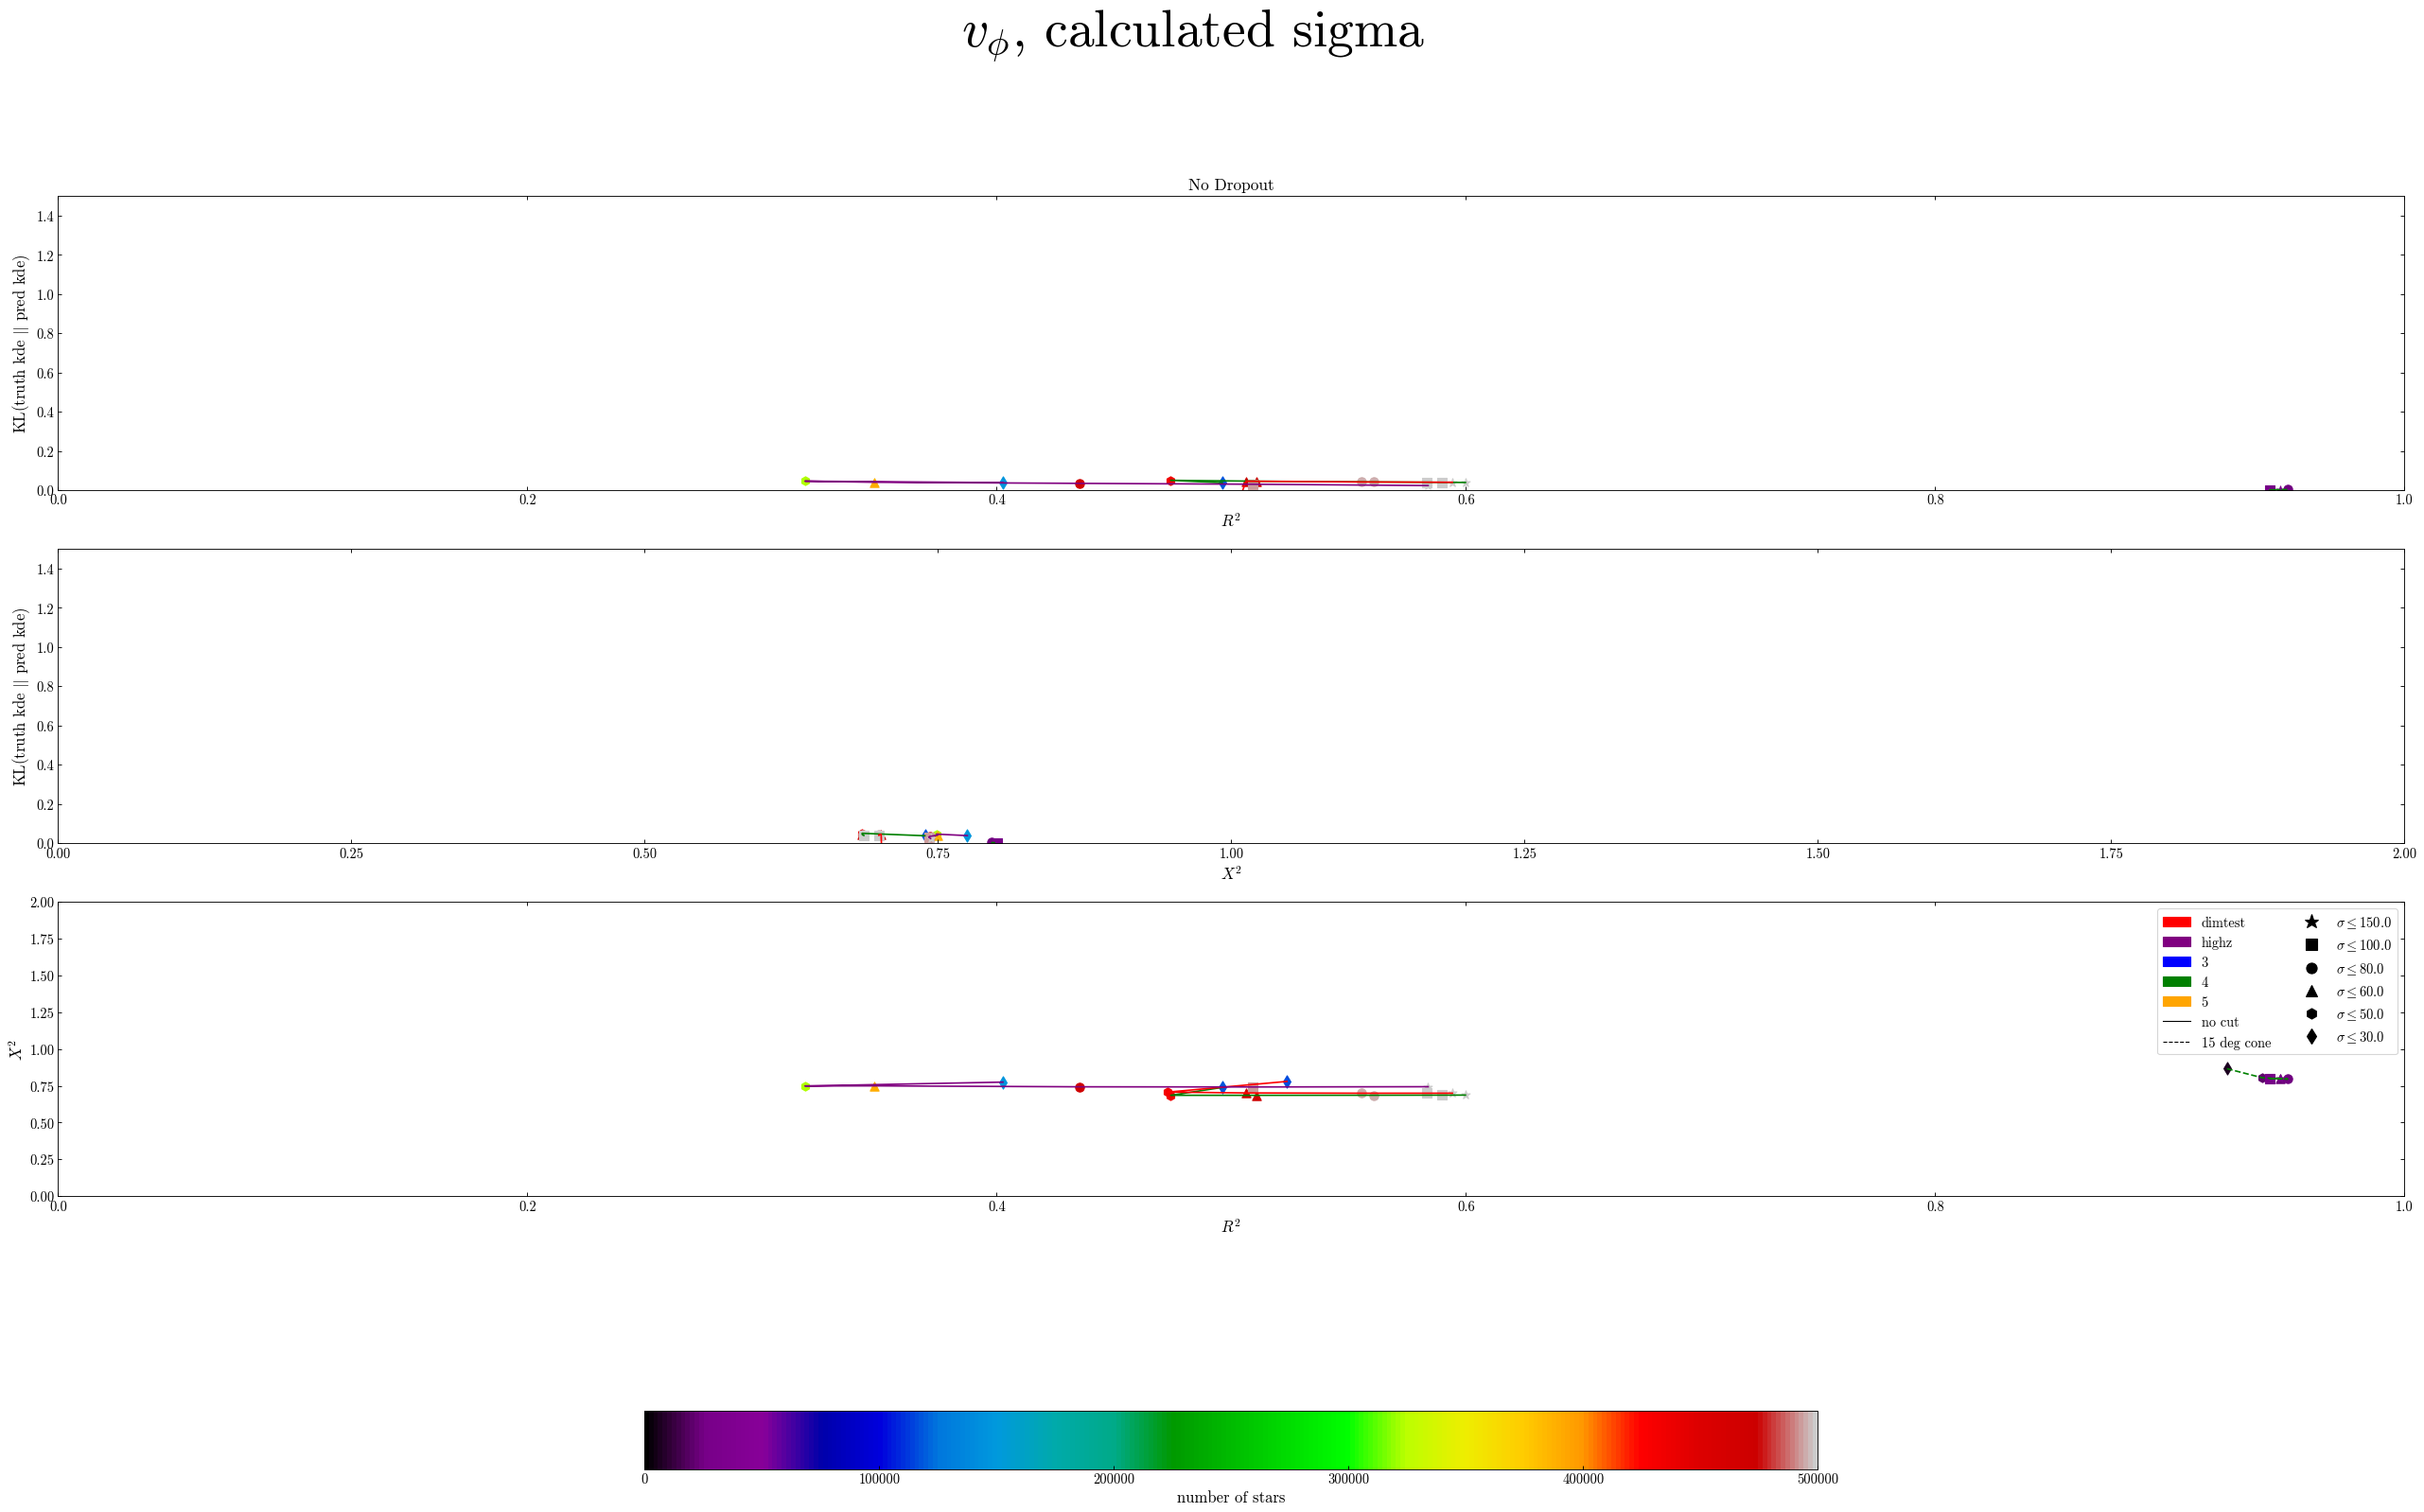

In [15]:
fig1, ax1 = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False,figsize=(40,25))
plot_KLvsR2(0,0,1,fig1,ax1)

if vel_str != 'vth': plot_KLvsX2(1,0,1,fig1,ax1,2)
else: plot_KLvsX2(1,0,1,fig1,ax1,2)
    
if vel_str != 'vth': plot_X2vsR2(2,0,1,fig1,ax1,2)
else: plot_X2vsR2(2,0,1,fig1,ax1,2)


if vel_str == 'vth': plt.suptitle('$v_{\\theta}$, '+type_sigma, fontsize = 50)
if vel_str == 'vlos': plt.suptitle('$v_{los}$, '+type_sigma, fontsize = 50)
if vel_str == 'vphi': plt.suptitle('$v_{\\phi}$, '+type_sigma, fontsize = 50)    
if vel_str == 'vr': plt.suptitle('$v_{r}$, '+type_sigma, fontsize = 50)
plt.savefig('compare_stat_X2loss_'+vel_str+'_'+tsigma+'.png')